In [1]:
#ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

#This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

#AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
#I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
#MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [2]:
#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.

month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: sales, dtype: float64


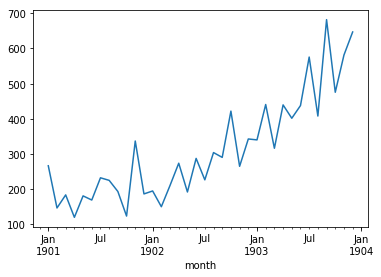

In [67]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales3.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


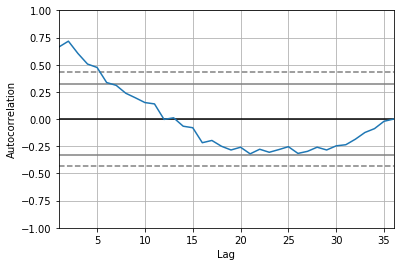

In [27]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales3.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(6, 1, 1)   Log Likelihood                -195.241
Method:                       css-mle   S.D. of innovations             62.195
Date:                Fri, 28 Sep 2018   AIC                            408.483
Time:                        10:06:35   BIC                            422.481
Sample:                    02-01-1901   HQIC                           413.315
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3838      5.667      2.185      0.038       1.276      23.491
ar.L1.D.sales    -0.5858      0.569     -1.029      0.312      -1.701       0.530
ar.L2.D.sales     0.0100      0.607     

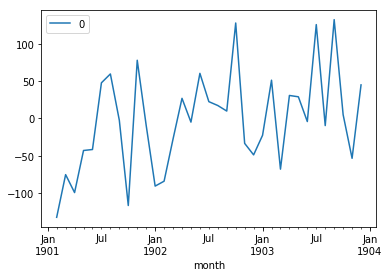

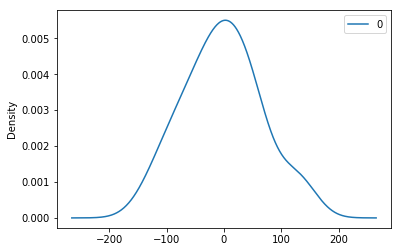

                0
count   35.000000
mean    -2.774059
std     66.676838
min   -132.483843
25%    -45.865836
50%     -4.143453
75%     37.901995
max    132.426622


In [47]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales3.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(6,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [29]:
series

month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: sales, dtype: float64

predicted=345.692055, expected=342.300000
predicted=305.082422, expected=339.700000
predicted=386.421594, expected=440.400000
predicted=348.546163, expected=315.900000
predicted=386.366660, expected=439.300000
predicted=355.288562, expected=401.300000
predicted=444.967344, expected=437.400000
predicted=393.170175, expected=575.500000
predicted=436.270349, expected=407.600000
predicted=507.796207, expected=682.000000
predicted=445.167794, expected=475.300000
predicted=655.825348, expected=581.300000
predicted=560.353729, expected=646.900000
Test MSE: 6810.071


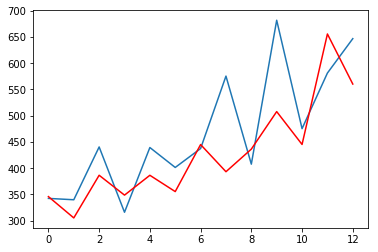

In [60]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales3.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
## tunning part

In [41]:

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error


In [42]:

import warnings
warnings.filterwarnings("ignore")

In [43]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [45]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales3.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [46]:

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.217
ARIMA(0, 0, 2) MSE=23989.597
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.206
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.029
ARIMA(1, 0, 0) MSE=23112.933
ARIMA(1, 1, 0) MSE=7121.365
ARIMA(1, 1, 1) MSE=7003.687
ARIMA(1, 2, 0) MSE=18608.045
ARIMA(2, 0, 0) MSE=10176.546
ARIMA(2, 1, 0) MSE=5689.929
ARIMA(2, 1, 1) MSE=7759.710
ARIMA(2, 2, 0) MSE=9860.932
ARIMA(4, 1, 0) MSE=6649.597
ARIMA(4, 1, 1) MSE=6796.265
ARIMA(4, 2, 0) MSE=7596.333
ARIMA(4, 2, 1) MSE=4694.870
ARIMA(6, 1, 0) MSE=6810.076
ARIMA(6, 1, 1) MSE=4359.601
ARIMA(6, 2, 0) MSE=6261.046
ARIMA(8, 1, 0) MSE=6579.247
Best ARIMA(6, 1, 1) MSE=4359.601
